In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import resample
from sklearn.metrics import *
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%pip install Sastrawi
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data=pd.read_csv('datapinjol.csv',sep=',', error_bad_lines = False)
# data = data.drop('label', axis=1)
data

,tweet,label
0,Ku kan menghilang jauh dari mu\nTak terlihat s...,Negative
1,@vrangirl @ntijamet @anakpagiarto @sekarp11019...,Negative
2,Maaf bgt jika keluar topik. aku mohon infonya ...,Negative
3,@Shibapump98 @DOGEZILLACOIN Lah uang dingin ko...,Negative
4,@tandatanya3kali Asal jangan scroll aplikasi p...,Negative
...,...,...
995,@WagimanDeep212_ Sadis emang kalo udh urusan s...,Negative
996,"RT Mengingat maraknya pinjol ilegal, presiden ...",Negative
997,RT Teror2 ke masyarakat kecil oleh pinjol onli...,Negative
998,RT Presiden Joko Widodo memerintahkan Otoritas...,Negative


# CLEANSING

In [ ]:
cleansing=[]
for x in data['tweet']:
    temporary=word_tokenize(str(x))
    temporary=[word for word in temporary if word.isalpha()]
    cleansing.append(temporary)

In [ ]:
cleansing

[['Ku',
  'kan',
  'menghilang',
  'jauh',
  'dari',
  'mu',
  'Tak',
  'terlihat',
  'sehelai',
  'rambutpun',
  'Tapi',
  'dimana',
  'nanti',
  'kau',
  'terluka',
  'Cari',
  'pinjaman',
  'online',
  'cepat',
  'dengan',
  'bunga',
  'ringan',
  'Di',
  'THEFWCORP',
  'bisa',
  'beli',
  'leot',
  'pakai',
  'funpaylater',
  'ayo',
  'tunggu',
  'apa',
  'lagi',
  'borong',
  'itemnya',
  'sekarang',
  'https'],
 ['vrangirl',
  'ntijamet',
  'anakpagiarto',
  'ezash',
  'Org',
  'Ambon',
  'kebanyakan',
  'jadi',
  'debt',
  'kolektor',
  'penagih',
  'pinjol',
  'itu',
  'org',
  'ambon',
  'maaf',
  'bukan',
  'rasis',
  'tapi',
  'emg',
  'kenyataan',
  'begitu'],
 ['Maaf',
  'bgt',
  'jika',
  'keluar',
  'topik',
  'aku',
  'mohon',
  'infonya',
  'kok',
  'aku',
  'jadi',
  'dpt',
  'tf',
  'gini',
  'ya',
  'Aku',
  'takut',
  'bgt',
  'sekali',
  'dpt',
  'dan',
  'itu',
  'bisa',
  'Aku',
  'ga',
  'ada',
  'pinjol',
  'samsek',
  'Tolongg',
  'aku',
  'Work',
  'https'],

# TOKENIZATION

In [ ]:
def tokenizerr(x):
    return x.split(' ')

In [ ]:
tokeneddata=[]
for i,x in enumerate(cleansing):
    tokeneddata.append(" ".join(map(str, x)))
tfidf= TfidfVectorizer(tokenizer=tokenizerr,use_idf=True, smooth_idf=True, sublinear_tf=False)
tfidf.fit_transform([tokeneddata[0]])
print(tfidf.get_feature_names())


['apa', 'ayo', 'beli', 'bisa', 'borong', 'bunga', 'cari', 'cepat', 'dari', 'dengan', 'di', 'dimana', 'funpaylater', 'https', 'itemnya', 'jauh', 'kan', 'kau', 'ku', 'lagi', 'leot', 'menghilang', 'mu', 'nanti', 'online', 'pakai', 'pinjaman', 'rambutpun', 'ringan', 'sehelai', 'sekarang', 'tak', 'tapi', 'terlihat', 'terluka', 'thefwcorp', 'tunggu']


In [ ]:
new_data = pd.DataFrame()
new_data['tweet']=pd.Series(tokeneddata)
new_data['Label']=data['label']

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   1000 non-null   object
 1   Label   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [ ]:
new_data['Label'].value_counts()

Negative    595
Positive    340
Neutral      65
Name: Label, dtype: int64

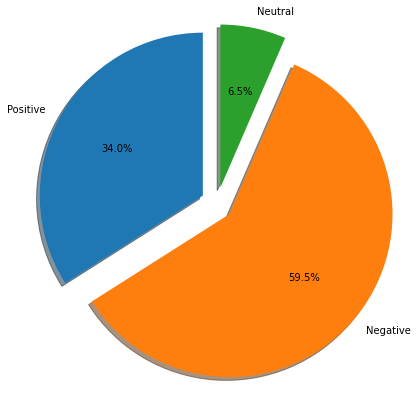

In [ ]:
import matplotlib.pyplot as plt
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
Labels = 'Positive', 'Negative', 'Neutral'
sizes = [new_data[new_data.Label=='Positive'].shape[0], new_data[new_data.Label=='Negative'].shape[0],
         new_data[new_data.Label=='Neutral'].shape[0]]
explode = (0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode=explode, labels=Labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:

df_upsampled = pd.DataFrame()
df_upsampled['Label'] = new_data['Label']
df_upsampled['tweet'] = new_data['tweet']

In [ ]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   1000 non-null   object
 1   tweet   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


# CASE FOLDING

In [ ]:
df_upsampled['tweet'] = df_upsampled['tweet'].str.lower()
df_upsampled['tweet'].head()

0    ku kan menghilang jauh dari mu tak terlihat se...
1    vrangirl ntijamet anakpagiarto ezash org ambon...
2    maaf bgt jika keluar topik aku mohon infonya k...
3    dogezillacoin lah uang dingin ko panik situ pi...
4             asal jangan scroll aplikasi pinjol wkwkw
Name: tweet, dtype: object

# STEMMING and STOPWORD

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()


words = []
for i, kalimat in enumerate (df_upsampled['tweet']):
    stop = stemmer.stem(kalimat)
    words.append(stop)

new = pd.DataFrame()
new['ulasan']=pd.Series(words)

replace_set = {'maka', 'yang', 'dengan', 'atau', 'akan', 'kepada', 'sebagai', 'oleh', 'dan'}

new['ulasan'] = new['ulasan'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in replace_set))

df_upsampled['tweet'] = new['ulasan']
df_upsampled['tweet'].head()

0    ku kan hilang jauh dari mu tak lihat hela ramb...
1    vrangirl ntijamet anakpagiarto ezash org ambon...
2    maaf bgt jika keluar topik aku mohon info kok ...
3    dogezillacoin lah uang dingin ko panik situ pi...
4             asal jangan scroll aplikasi pinjol wkwkw
Name: tweet, dtype: object

In [ ]:
df_upsampled['tweet'][520]

'akun instagram palsu follow dm kamu lebih dahulu untuk tawar bantu akun resmi singaid hanya tera pada tombol di dalam aplikasi singa kalian ya singaid singafintech resmiojk pinjam'

# Resample

In [ ]:
from sklearn.utils import resample

df_majority = new_data[new_data.Label=='Negative']
df_minority1 = new_data[new_data.Label=='Positive']
df_minority2 = new_data[new_data.Label=='Neutral']



df_minority_upsampled1 = resample(df_minority1, 
                                 replace=True,    
                                 n_samples=new_data[new_data.Label =='Negative'].shape[0],    
                                 random_state= 123) 
df_minority_upsampled2 = resample(df_minority2, 
                                 replace=True,    
                                 n_samples=new_data[new_data.Label =='Negative'].shape[0],    
                                 random_state=123) 
df_upsampled = pd.concat([df_majority, df_minority_upsampled1, df_minority_upsampled2])

In [ ]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1785 entries, 0 to 798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   1785 non-null   object
 1   Label   1785 non-null   object
dtypes: object(2)
memory usage: 41.8+ KB


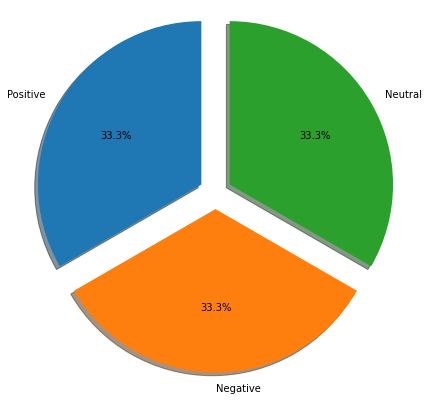

In [ ]:
import matplotlib.pyplot as plt
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
Labels = 'Positive', 'Negative', 'Neutral'
sizes = [df_upsampled[df_upsampled.Label=='Positive'].shape[0], df_upsampled[df_upsampled.Label=='Negative'].shape[0],
         df_upsampled[df_upsampled.Label=='Neutral'].shape[0]]
explode = (0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode=explode, labels=Labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

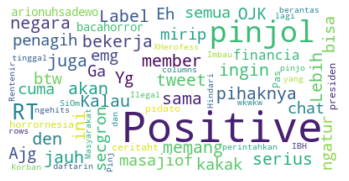

In [ ]:
from wordcloud import WordCloud
text = df_upsampled.loc[df_upsampled['Label'] == 'Positive']
wordcloud = WordCloud(max_font_size=50, 
max_words=200, background_color="white").generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

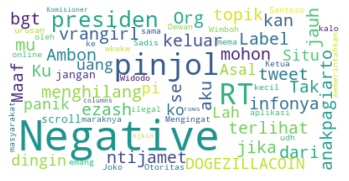

In [ ]:
from wordcloud import WordCloud
text = df_upsampled.loc[df_upsampled['Label'] == 'Negative']
wordcloud = WordCloud(max_font_size=50, 
max_words=200, background_color="white").generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

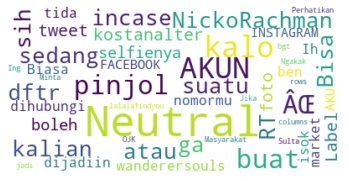

In [ ]:
from wordcloud import WordCloud
text = df_upsampled.loc[df_upsampled['Label'] == 'Neutral']
wordcloud = WordCloud(max_font_size=50, 
max_words=200, background_color="white").generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
X = df_upsampled['tweet'].values
y = df_upsampled['Label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

# TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_transformer = TfidfVectorizer()
tf_transformer.fit(X_train)
X_train_tf = tf_transformer.transform(X_train)
X_test  = tf_transformer.transform(X_test)
X_train_tf.shape

(1606, 3375)

In [ ]:
feature_names = tf_transformer.get_feature_names()
dense = X_test.todense()
denselist = dense.tolist()
pd.DataFrame(denselist, columns=feature_names).head(10)

,aamin,ab,abal,abang,abas,abis,absetyono,acara,acc,aceh,ad,ada,adakamiofficial,adalah,adangsolar,adapanichsay,adaratusanfitur,adasingasemuab,adel,adele,adi,adiknya,admin,ads,adu,aduh,ae,aelah,aeyoojimn,afpi,after,aftersevx,agak,agama,agar,agen,agenda,ah,ahnyujinnive,aib,...,xbbycvte,xherofess,xi,xixi,xixixi,xmassy,ya,yaa,yah,yaitu,yak,yakni,yang,yani,yauda,yaudahlah,ye,yeonzyun,yes,yg,ylki,yogyakarta,yok,you,your,yourbae,yourboifi,youtube,yudhawidy,yuk,yunnazn,yuraidn,zarazettirazr,zina,zodiac,âœ,âš,âž,âƒ,âˆ
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.318978
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.791106,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.139215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.157371,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.103351,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.287825,0.0,0.0,0.0,0.0,0.0,0.199365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.192875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.112376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000

In [ ]:
X_train_tf.shape, X_test.shape, y_train.shape, y_test.shape

((1606, 3375), (179, 3375), (1606,), (179,))

In [ ]:
print(X_test)

  (0, 3374)	0.31897806149802027
  (0, 3010)	0.2474817554778445
  (0, 2975)	0.2861777784080174
  (0, 2855)	0.2194455047242724
  (0, 2483)	0.14774165845191817
  (0, 2338)	0.31897806149802027
  (0, 2266)	0.1639072339139424
  (0, 2196)	0.3135442316555399
  (0, 2025)	0.2861777784080174
  (0, 1817)	0.18848822437548257
  (0, 1713)	0.30414123746887595
  (0, 1549)	0.26628774385117254
  (0, 1369)	0.2002252676734771
  (0, 1107)	0.31897806149802027
  (0, 59)	0.18848822437548257
  (1, 3235)	0.3027629690405242
  (1, 2918)	0.33605978949408616
  (1, 2894)	0.2725663957075235
  (1, 2674)	0.18703209704519314
  (1, 2557)	0.36935660994764813
  (1, 2488)	0.056089143801409086
  (1, 2302)	0.25416853647050675
  (1, 1722)	0.22919519702465888
  (1, 1526)	0.33605978949408616
  (1, 1300)	0.36935660994764813
  :	:
  (177, 2488)	0.04533665808418603
  (177, 2486)	0.19895711556092957
  (177, 2296)	0.20724982754113808
  (177, 2249)	0.13331158917443642
  (177, 1370)	0.1874153543344624
  (177, 1328)	0.324404862210216
  (

In [ ]:
model=  RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train_tf, y_train)
predict = model.predict(X_test)


In [ ]:
print(classification_report(y_test, predict))
print('\n')
cm = confusion_matrix(y_test, predict)
print(cm)
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, predict))

              precision    recall  f1-score   support

    Negative       0.90      0.86      0.88        63
     Neutral       0.99      1.00      0.99        67
    Positive       0.84      0.88      0.86        49

    accuracy                           0.92       179
   macro avg       0.91      0.91      0.91       179
weighted avg       0.92      0.92      0.92       179



[[54  1  8]
 [ 0 67  0]
 [ 6  0 43]]


Accuracy Score:  0.9162011173184358


In [ ]:
model.score(X_train_tf.toarray(),y_train)

0.9950186799501868

In [ ]:
model.score(X_test,y_test)

0.9162011173184358